In [182]:
# Python 3.9.0
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from conversation_data.csv
df = pd.read_csv('conversation_data.csv')
df.head()

,conversation_id,user_id,user_email,usage_frequency,support_agent_id,started_at,closed_at,company_id,company_name,subscription_id,subscription_type,score_id,created_at,score
0,76b9a154-a419-4d77-9f60-189413d984cd,893,nelsonjacob@example.org,83,1843,2023-02-17 08:15:19,2023-02-18 22:15:19,44,"Peterson, Rice and Wilson",303773e1-43b4-47a1-a811-48c481afc6a4,enterprise,0e3dd520-8377-4376-bbdb-0347bfe21d51,2023-02-17 08:15:19,2
1,9e13377f-4802-4c6d-a23f-07a7cfea6dc9,200,daltonanderson@example.org,23,1777,2023-05-18 21:43:30,2023-05-20 08:43:30,9,Lee Ltd,8b6d1ed9-82e8-4a21-b532-412f955c3bac,enterprise,d465b64f-4253-45b0-bd1f-309c3f642b2d,2023-05-18 21:43:30,5
2,494d9e3b-2ce3-4992-bb7e-d879725c863d,664,stevenfoster@example.com,13,1604,2023-06-06 03:06:45,2023-06-06 19:06:45,34,Neal Inc,899b8692-00d9-47cc-ab36-d559c4484c7c,self-serve,3fcb6f8d-5edd-44f2-ba91-7ef490c8e030,2023-06-06 03:06:45,5
3,2d419f5e-d2d8-494b-9485-b9d396df96cb,390,smithjulie@example.org,47,1430,2023-01-12 12:39:46,2023-01-13 23:39:46,50,Gutierrez LLC,a87bd8fb-b9a7-4ff9-b9a7-ce71bc127fb3,free,854a71c7-15cc-4714-90f6-6ff138f43a57,2023-01-12 12:39:46,3
4,a1eb202a-6956-4fdb-9baa-bc20857d1ad2,838,uhudson@example.org,57,1981,2023-03-27 12:34:55,2023-03-29 22:34:55,1,Anderson-Robles,61e1779a-730e-4eca-947f-75410c9a43d3,enterprise,2ecb0bb7-0d62-4cf1-b456-a64f56735385,2023-03-27 12:34:55,2


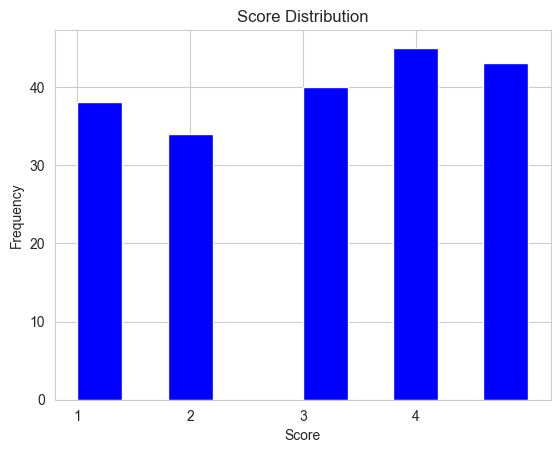

In [183]:
# Create a bar chart using column score from the dataframe
plt.hist(df['score'], bins=10, color='blue')
plt.title('Score Distribution')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.xticks(np.arange(1, 5, 1))
plt.show()

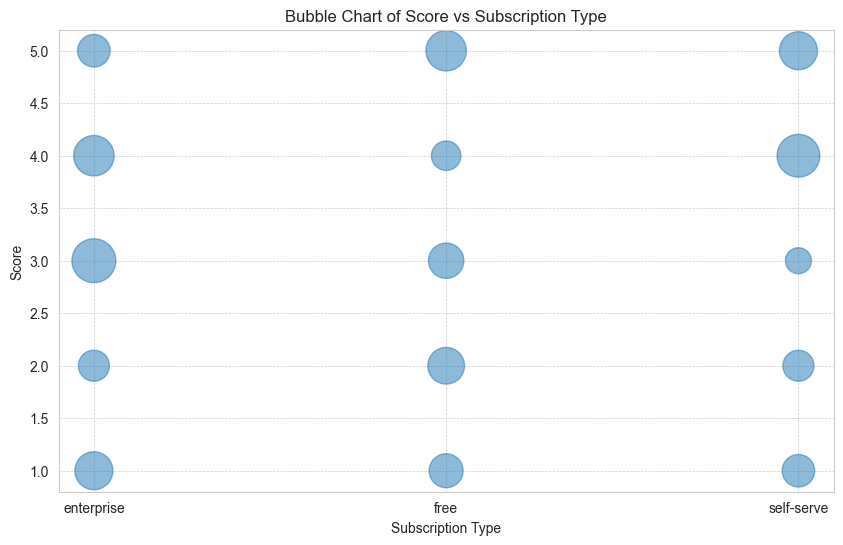

In [184]:
# Create bubble chart with score on the y axis subscruption_type on the x axis and number of users as the size of the bubble using the dataframe
grouped_df = df.groupby(['subscription_type', 'score']).size().reset_index(name='number_of_users')
grouped_df.head()

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot the bubble chart
plt.scatter(grouped_df['subscription_type'], grouped_df['score'], s=grouped_df['number_of_users']*50, alpha=0.5)

# Set the labels and title
plt.xlabel('Subscription Type')
plt.ylabel('Score')
plt.title('Bubble Chart of Score vs Subscription Type')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Display the plot
plt.show()


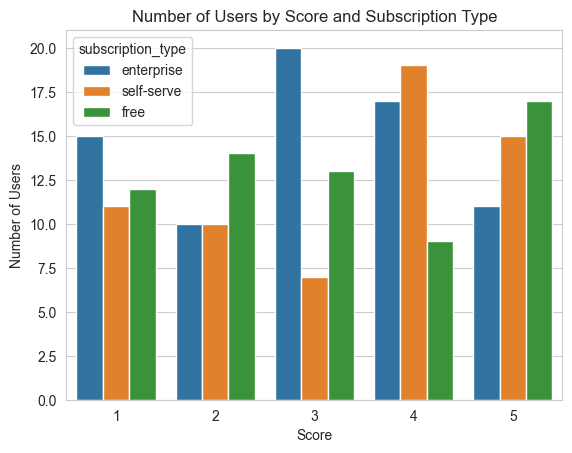

In [185]:
# Create a grouped bar chart with the score on the x axis and the number of users on the y axis grouped by the subscription type
sns.countplot(data = df, x = 'score', hue = 'subscription_type')
plt.xlabel('Score')
plt.ylabel('Number of Users')
plt.title('Number of Users by Score and Subscription Type');


<AxesSubplot: ylabel='company_name'>

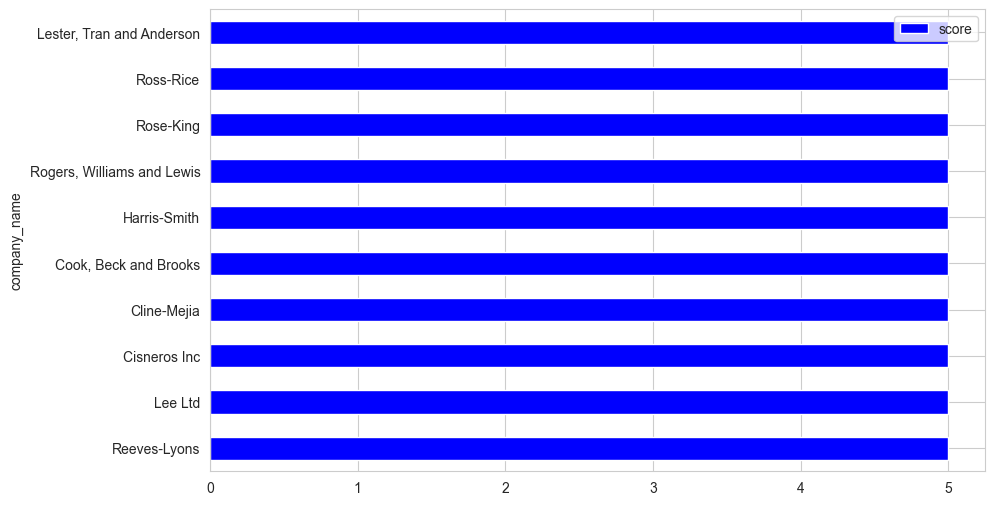

In [186]:
# Create a vertical bar chart with companies on the y axis and their average score on the x axis from the dataframe
# create a new datafroame grouping the companies and calculating the average score for each company
company_score = pd.DataFrame(df.groupby('company_name')['score'].mean())
company_score = company_score.sort_values(by='score', ascending=False)
company_score.head(10).plot(kind='barh', figsize=(10, 6), color='blue')

<AxesSubplot: ylabel='support_agent_id'>

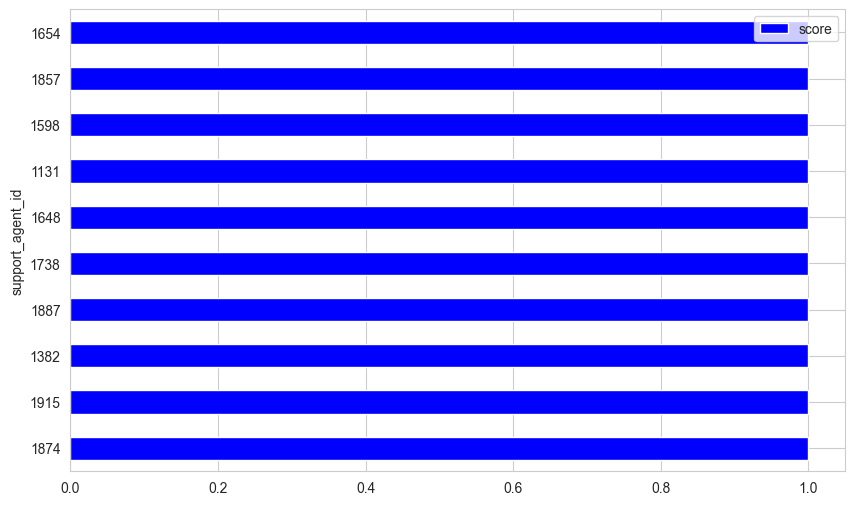

In [200]:
# Create a bar chart based on the average score for each support agent
# Group df by support agent and calculate average score
agent_score_group = pd.DataFrame(df.groupby('support_agent_id')['score'].mean())
# Order it descendingly by score
agent_score_group = agent_score_group.sort_values(by='score', ascending=True)
agent_score_group.head()
# Create a vertical bar chart 
agent_score_group.head(10).plot(kind='barh', figsize=(10, 6), color='blue')

/var/folders/q5/129jvbqn7697cxyglg65t6gr0000gn/T/ipykernel_9154/2183387223.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  agent_duration_group = df.groupby('support_agent_id').mean().reset_index()


<AxesSubplot: ylabel='support_agent_id'>

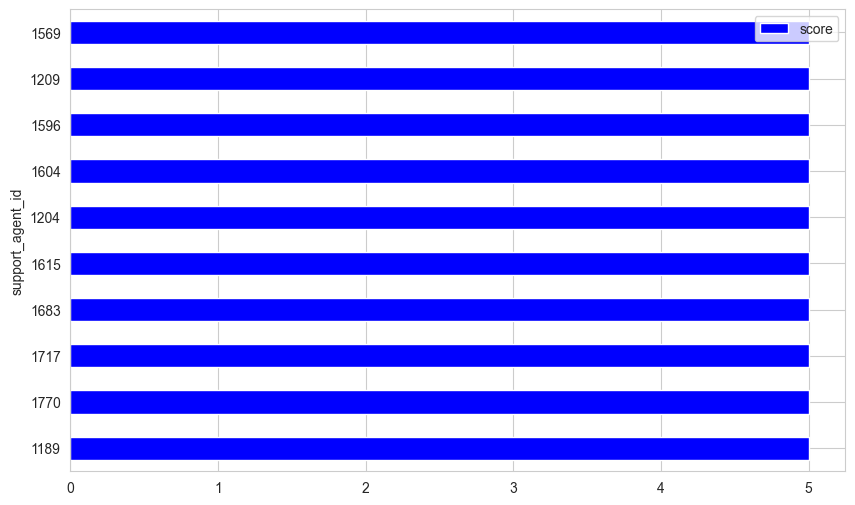

In [199]:
# Convert the started_at and closed_at column to datetime
df['started_at'] = pd.to_datetime(df['started_at'])
df['closed_at'] = pd.to_datetime(df['closed_at'])
df['duration'] = df['closed_at'] - df['started_at']
# Convert the duration column to hours
df['duration'] = df['duration'].astype('timedelta64[h]')

# Group the dataframe by support_agent_id and calculate the mean of the duration column
agent_duration_group = df.groupby('support_agent_id').mean().reset_index()
# Sort the dataframe by the duration column
agent_duration_group = agent_duration_group.sort_values(by='duration', ascending=True).reset_index(drop=True)

agent_score_group.head(10).plot(kind='barh', figsize=(10, 6), color='blue')

<AxesSubplot: xlabel='month,year'>

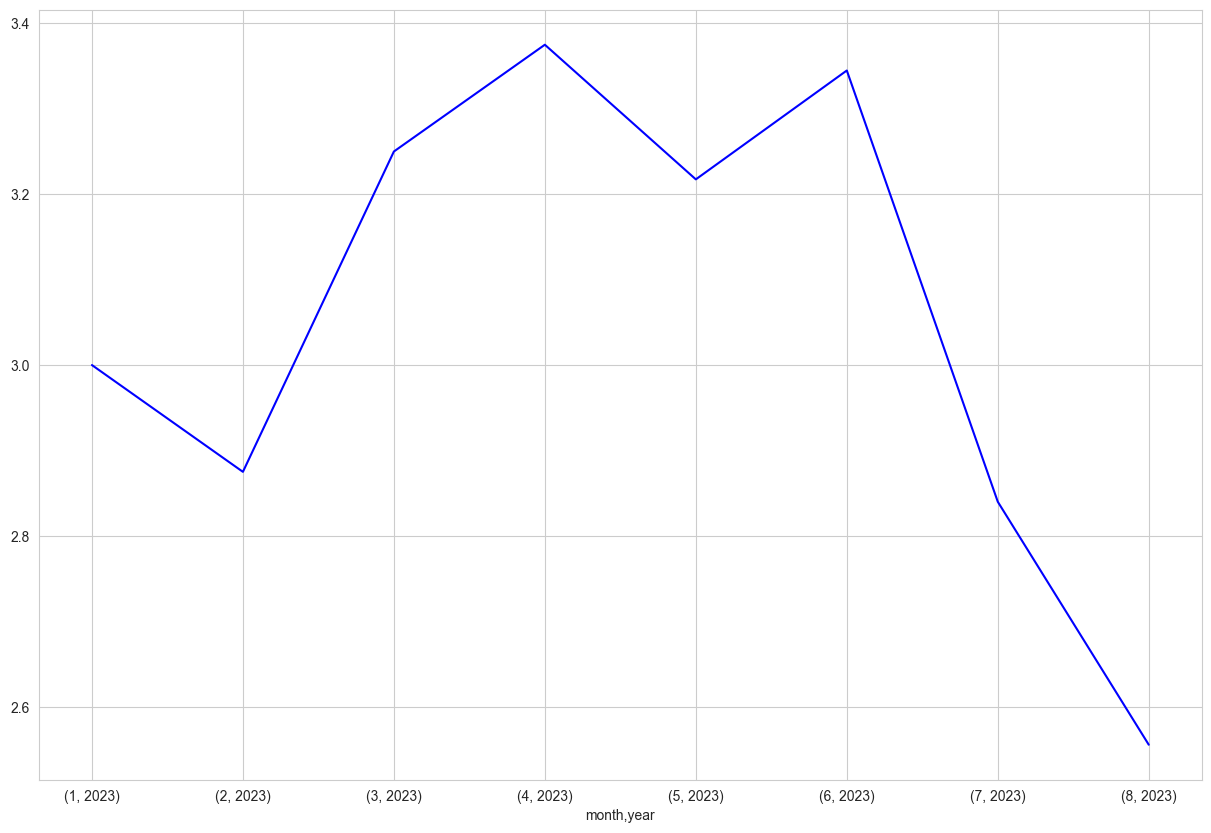

In [189]:
# group the created_at column by month and year
df['created_at'] = pd.to_datetime(df['created_at'])
df['month'] = df['created_at'].dt.month
df['year'] = df['created_at'].dt.year
df.head()

# group the created_at column by month and year and average the score column
date_score_group = df.groupby(['month', 'year'])['score'].mean()

# plot the average score per month and year
date_score_group.plot(kind='line', figsize=(15, 10), color='blue')

<AxesSubplot: title={'center': 'Average Score by Subscription Type'}, ylabel='subscription_type'>

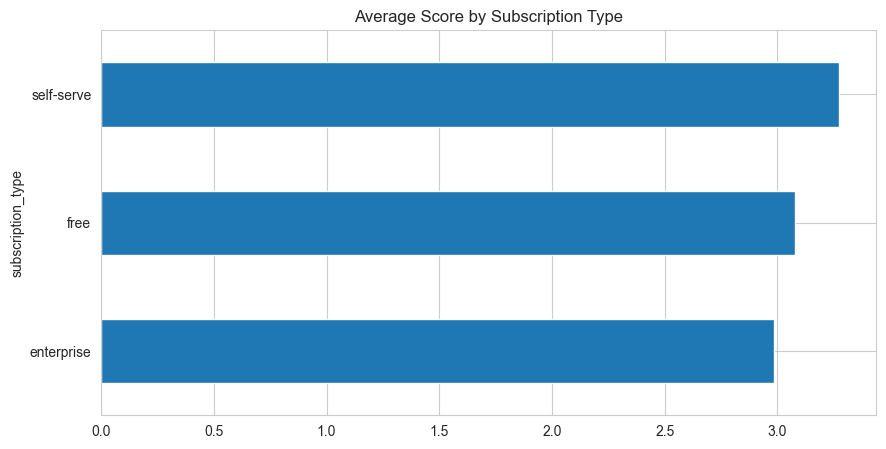

In [198]:
sub_score_group = df.groupby(['subscription_type'])['score'].mean()
sub_score_group = sub_score_group.sort_values(ascending=True)
sub_score_group.plot(kind='barh', figsize=(10,5), title='Average Score by Subscription Type')

<AxesSubplot: xlabel='month,year'>

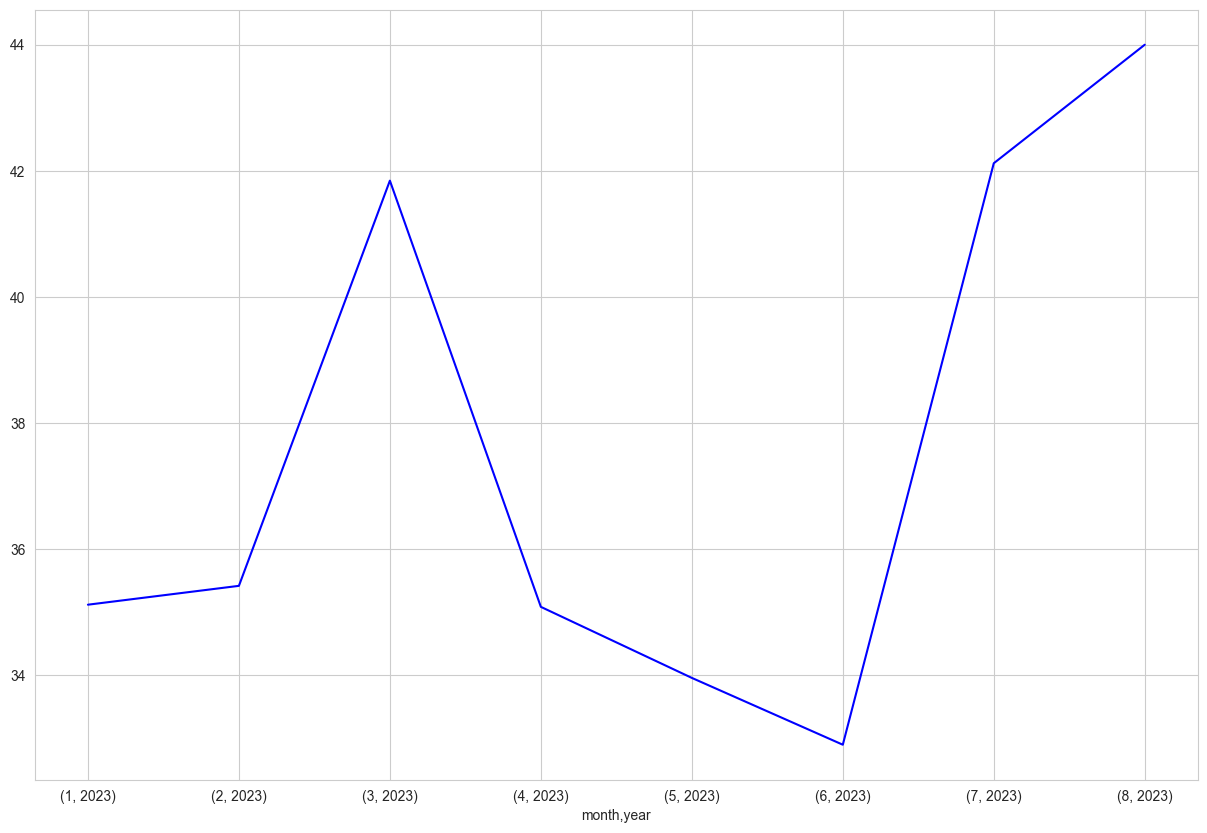

In [206]:
con_dur_group = df.groupby(['month', 'year'])['duration'].mean()
con_dur_group.plot(kind='line', figsize=(15, 10), color='blue')